In [188]:
from monai import transforms

def peek_shape(x):
    print(x.shape)
    print("max", x.max())
    print("min", x.min())
    return x
import torch

import matplotlib.pyplot as plt

def display_image(og_img):
    img = og_img[0]
    axial = img[..., img.shape[2] // 2] # XYZ => X-Y Plane
    coronal = img[:, img.shape[1] // 2, ...] # XYZ
    sagittal = img[img.shape[0] // 2, ...]
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), constrained_layout=False)

    for ax in axs:
        ax.axis("off")
    ax = axs[0]
    ax.imshow(sagittal, cmap="gray")
    ax = axs[1]
    ax.imshow(coronal, cmap="gray")
    ax = axs[2]
    ax.imshow(axial, cmap="gray")

    plt.show()

    return og_img

test_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.Lambdad(keys="image", func=lambda x: x[0, :, :, :]),
        transforms.EnsureChannelFirstd(keys=["image"], channel_dim="no_channel"),
        transforms.Orientationd(keys=["image"], axcodes="IPL"),
        transforms.ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0),
        transforms.EnsureTyped(keys=["image"]),
        #transforms.ScaleIntensityRangePercentilesd(keys="image", lower=0.5, upper=99.5, b_min=0, b_max=1),
        transforms.Lambdad(keys="image", func=peek_shape),
        transforms.Lambdad(keys="image", func=display_image),
    ]
)

torch.Size([1, 160, 224, 160])
max metatensor(1.)
min metatensor(0.)


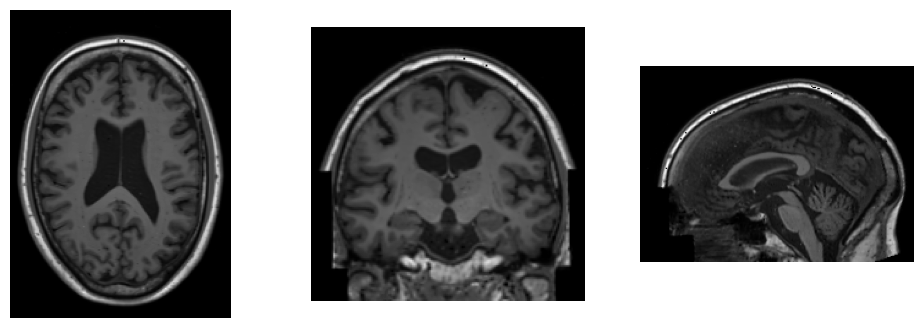

torch.Size([1, 160, 224, 160])


In [189]:
sample_entry_LDM_100k = {"image":"/homes/tim/thesis/own_experiments/data/LDM_100k/rawdata/sub-000002/anat/sub-000002_T1w.nii.gz"}

img = test_transforms(sample_entry_LDM_100k)["image"]

print(img.shape)



torch.Size([1, 143, 228, 194])
max metatensor(1.)
min metatensor(0.)


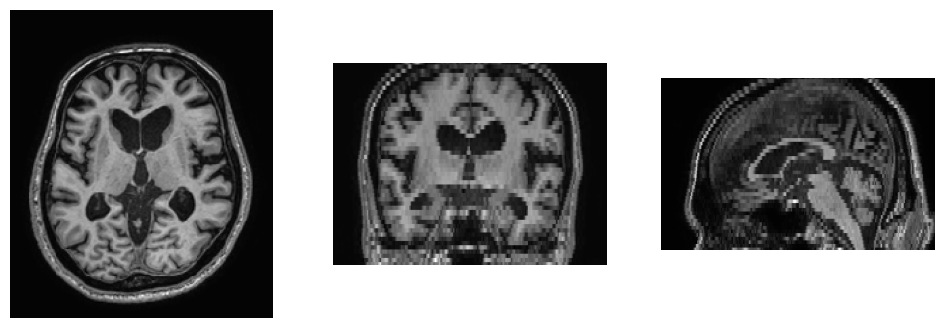

In [190]:
test_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.Lambdad(keys="image", func=lambda x: x[0, :, :, :]),
        transforms.EnsureChannelFirstd(keys=["image"], channel_dim="no_channel"),
        transforms.Orientationd(keys=["image"], axcodes="LAI"),
        transforms.ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0),
        transforms.EnsureTyped(keys=["image"]),
        #transforms.ScaleIntensityRangePercentilesd(keys="image", lower=0.5, upper=99.5, b_min=0, b_max=1),
        transforms.Lambdad(keys="image", func=peek_shape),
        transforms.Lambdad(keys="image", func=display_image),
    ]
)

sample_for_resnet = {"image":"/homes/tim/thesis/own_experiments/data/MRBrainS18_sample/070.nii.gz"}

img = test_transforms(sample_for_resnet)